In [ ]:
from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, loadMCSamples, MCSamples
import getdist
# use this *after* importing getdist if you want to use interactive plots
# %matplotlib notebook
import matplotlib.pyplot as plt
import IPython
#print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
#matplotlib 2 may not work very well without usetex on, can uncomment
#plt.rcParams['text.usetex']=True
from matplotlib import rc
import seaborn as sns
from scipy.constants import c
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import argparse
import matplotlib.gridspec as gridspec

In [10]:
#delensed roots to chains

link=  './chains/base_nnu_mnu_plikHM_TTTEEE_lowl_lowE'

chains=getdist.loadMCSamples(link, settings={'ignore_rows':0.3,'smooth_scale_1D': 0.9,'smooth_scale_2D': 0.9});

In [7]:
#some useful function to get 1D distributions from getdist 

def left_x(chain, y_param):
    return chain.get1DDensity(y_param).x

def left_Px(chain, y_param):
    return chain.get1DDensity(y_param).P

def up_x(chain, x_param):
    return chain.get1DDensity(x_param).x

def up_Px(chain, x_param):
    return chain.get1DDensity(x_param).P

/var/folders/2y/t1c42csx6bx5vb64r23x1ct00000gp/T/ipykernel_71113/1776618876.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0_xDist.set_yticklabels(xDist_labels)
/var/folders/2y/t1c42csx6bx5vb64r23x1ct00000gp/T/ipykernel_71113/1776618876.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0_yDist.set_xticklabels(yDist_labels)


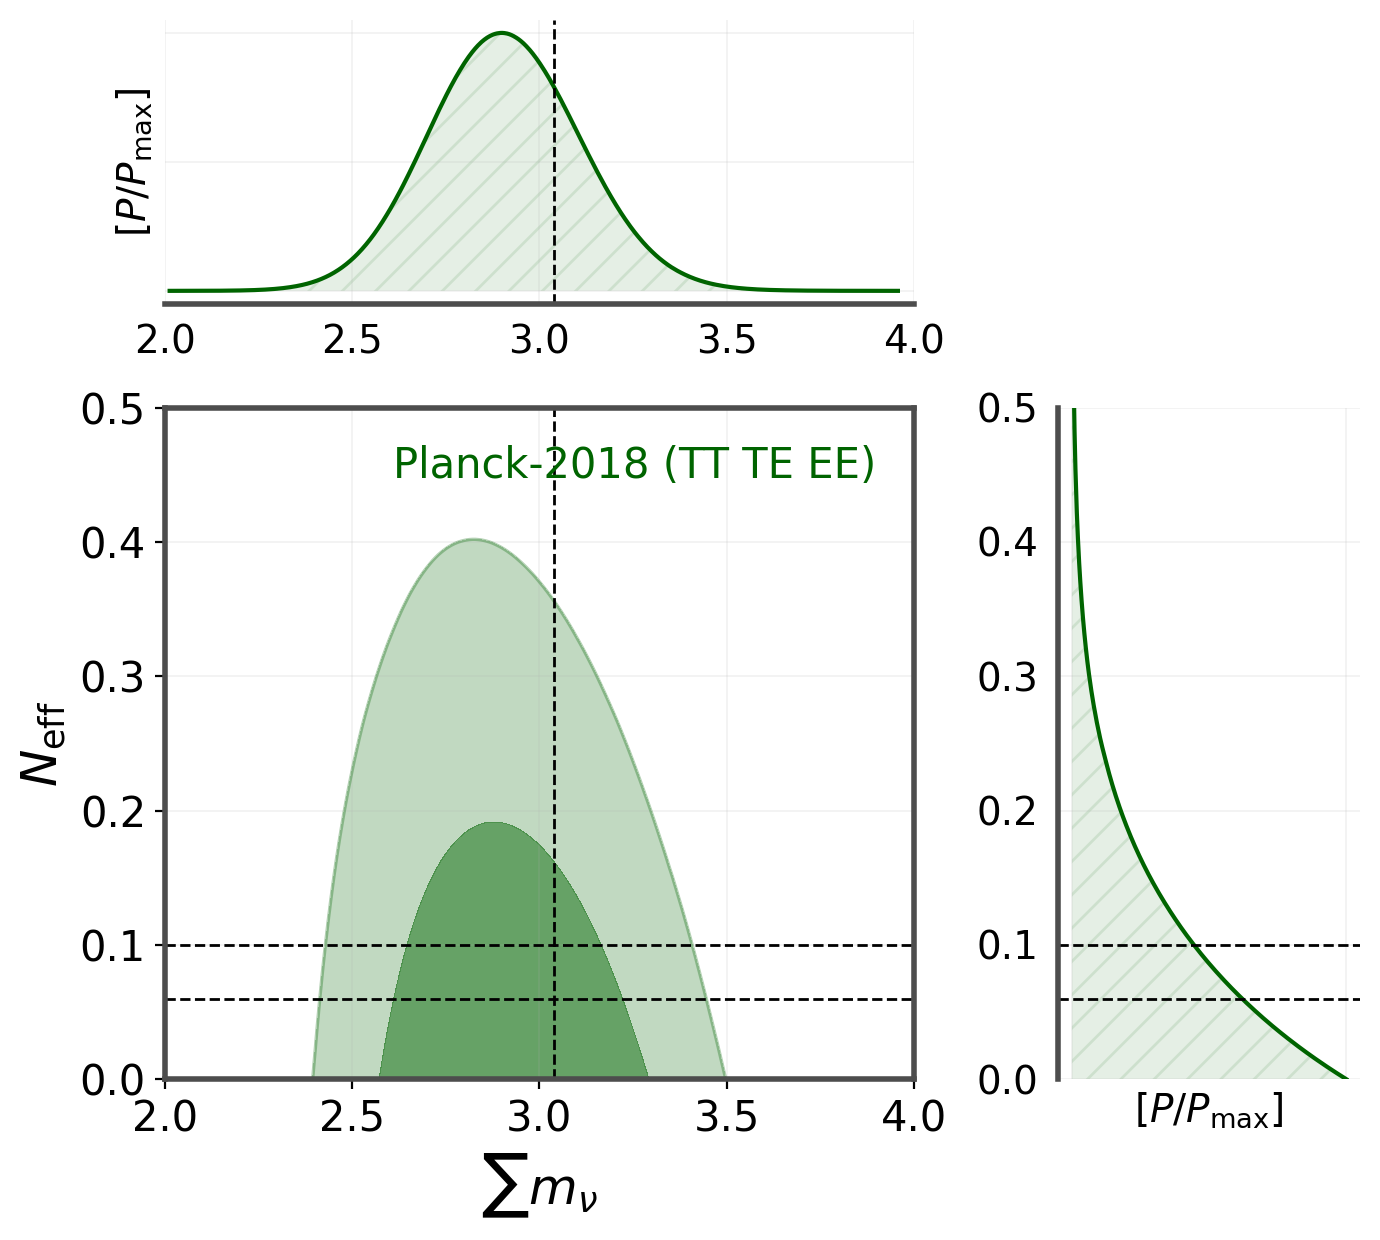

In [39]:
import matplotlib.gridspec as gridspec


#Setting matplotlib general plot params
plt.rcParams["axes.edgecolor"] = "0.3"
plt.rcParams["axes.linewidth"]  = "2"
plt.rcParams["ytick.labelsize"]  = "15"
plt.rcParams["xtick.labelsize"]  = "15"
plt.rcParams["axes.titlesize"]  = "15"
plt.rcParams["figure.figsize"] = [15, 15]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.autolayout"] = True
#defining get_single_plotter module
g = plots.get_single_plotter(width_inch=7,ratio=0.9)
gs = gridspec.GridSpec(3, 3)
ax0 = plt.subplot(gs[1:3, :2])

#setting xlim ylim of the plot
ax0.set_xlim(2,4)
ax0.set_ylim(0,0.5)

#setting xlabel ylabel
ax0.set_ylabel(r"$N_{\rm eff}$", fontsize = 18,rotation=90)
ax0.set_xlabel(r"$\sum m_{\nu}$", fontsize = 18,rotation=0)

#grid
ax0.grid(linewidth=0.1)


#setting params xDist
ax0_xDist = plt.subplot(gs[0, :2],sharex=ax0)
#axis setup
ax0_xDist.axes.linewidth= 0.5
ax0_xDist.spines['right'].set_visible(False)
ax0_xDist.spines['top'].set_visible(False)
ax0_xDist.spines['left'].set_visible(False)
ax0_xDist.tick_params(bottom=False)
ax0_xDist.tick_params(left=False)
ax0_xDist.tick_params(labelleft=False)
ax0_xDist.tick_params(labelright=True)
ax0_xDist.tick_params(labelsize=14)
#grid
ax0_xDist.grid(linewidth=0.1)
#label
ax0_xDist.set_ylabel(ylabel=r"$[P/P_{\rm{max}}]$", fontsize= 14)
# killing ticks
xDist_labels = [item.get_text() for item in ax0_xDist.get_yticklabels()]
for i in range(len(xDist_labels)):
    xDist_labels[i]=r''
ax0_xDist.set_yticklabels(xDist_labels)


# setting params yDist
ax0_yDist = plt.subplot(gs[1:3, 2],sharey=ax0)
#axis setup
ax0_yDist.spines['right'].set_visible(False)
ax0_yDist.spines['top'].set_visible(False)
ax0_yDist.spines['bottom'].set_visible(False)
ax0_yDist.tick_params(left=False)
ax0_yDist.tick_params(bottom=False)
ax0_yDist.tick_params(labeltop=True)
ax0_yDist.tick_params(labelbottom=False)
ax0_yDist.tick_params(labelsize=14)
#grid
ax0_yDist.grid(linewidth=0.1)
#label
ax0_yDist.set_xlabel(xlabel=r"$[P/P_{\rm{max}}]$", fontsize= 14)
# killing ticks
yDist_labels = [item.get_text() for item in ax0_yDist.get_xticklabels()]
for i in range(len(yDist_labels)):
    yDist_labels[i]=r' '
ax0_yDist.set_xticklabels(yDist_labels)


#MAIN PLOT

#CL contours 2=68 and 95;  3= 68,95 and 99
g.settings.num_plot_contours = 2

#params to plot
x="nnu"
y="mnu"

#colors (it needs to be of the same lenght of number of chains)
col= ["Darkred","navy","Darkgreen","red"]

i=2
    
#2D contours
g.add_2d_contours(chains, x, y, filled=True, color=col[i],alpha=0.6)
    
#1D xDist (up plot)
ax0_xDist.plot(up_x(chains,x), up_Px(chains,x) ,color=col[i])
ax0_xDist.fill_between(up_x(chains,x), up_Px(chains,x), facecolor=col[i], hatch="//", edgecolor=col[i],alpha=0.1, linewidth=.01)
    
#2D yDist (left plot)
ax0_yDist.plot(left_Px(chains,y),left_x(chains, y), color=col[i])
ax0_yDist.fill_between(left_Px(chains,y),left_x(chains, y), facecolor=col[i], hatch="//", edgecolor=col[i],alpha=0.1, linewidth=.01)


#label of 2D contours
#they need to follows the same order of the chains
g.add_legend(['Planck-2018 (TT TE EE)'], colored_text=True , legend_loc='upper right', fontsize=15);


ax0.text(x=)

#adding sh0es band on main plot
#ax0.axvspan(73.04-1.04,73.04+1.04,color="k",alpha=0.3)
#ax0.axvline(73.04,color="k",linestyle="--", alpha=1, linewidth="1")

#adding sh0es band on 1D xDist (up plot)
#ax0_xDist.axvspan(73.04-1.04,73.04+1.04,color="k",alpha=0.3)
#ax0_xDist.axvline(73.04,color="k",linestyle="--", alpha=1, linewidth="1")


#adding markers
ax0.axhline(0.1,color="k",linestyle="--", alpha=1, linewidth="1")
ax0.axhline(0.06,color="k",linestyle="--", alpha=1, linewidth="1")
ax0.axvline(3.04,color="k",linestyle="--", alpha=1, linewidth="1")
ax0_yDist.axhline(0.1,color="k",linestyle="--", alpha=1, linewidth="1")
ax0_yDist.axhline(0.06,color="k",linestyle="--", alpha=1, linewidth="1")
ax0_xDist.axvline(3.04,color="k",linestyle="--", alpha=1, linewidth="1")

g.export("mnu_nnu.pdf")
